In [0]:
from google.colab import drive
drive.mount('/content/drive')

step_function.py

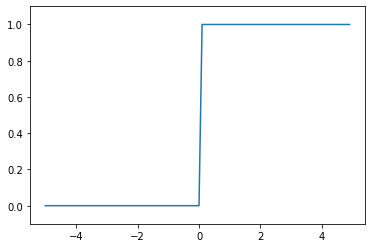

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
  return np.array(x > 0, dtype=np.int)

X = np.arange(-5.0, 5.0, 0.1) #-5.0, -4.9, ..., 5.0
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

sigmoid.py

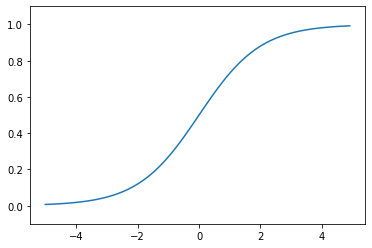

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

X = np.arange(-5.0, 5.0, 0.1) #-5.0, -4.9, ..., 5.0
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

sig_step_compare.py

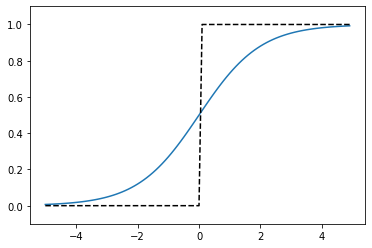

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
  return np.array(x > 0, dtype=np.int)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

X = np.arange(-5.0, 5.0, 0.1) #-5.0, -4.9, ..., 5.0
y1 = sigmoid(X)
y2 = step_function(X)
plt.plot(X, y1)
plt.plot(X, y2, 'k--')
plt.ylim(-0.1, 1.1)
plt.show()

mnist_show.py

In [0]:
import sys
sys.path.append("/content/drive/My Drive/Colab Notebooks/Oreilly/deep-learning-from-scratch_coding/")
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

from IPython.display import display

def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  # pil_img.show()  
  display(pil_img)

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

for i in np.arange(0, 10, 1):
  img = x_train[i]
  label = t_train[i]
  print(label)

  print(img.shape)
  img = img.reshape(28, 28)
  print(img.shape)

  img_show(img)

5
(784,)
(28, 28)


0
(784,)
(28, 28)


4
(784,)
(28, 28)


1
(784,)
(28, 28)


9
(784,)
(28, 28)


2
(784,)
(28, 28)


1
(784,)
(28, 28)


3
(784,)
(28, 28)


1
(784,)
(28, 28)


4
(784,)
(28, 28)


relu.py

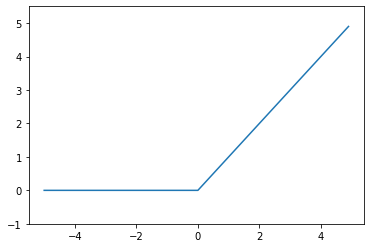

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
  return np.maximum(0, x)

X = np.arange(-5.0, 5.0, 0.1) #-5.0, -4.9, ..., 4.9
y = relu(X)
plt.plot(X, y)
plt.ylim(-1.0, 5.5)
plt.show()

neuralnet_mnist.py

In [0]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def softmax(x):
  if x.ndim == 2:
    x = x.T
    x = x - np.max(x, axis=0)
    y = np.exp(x) / np.sum(np.exp(x), axis=0)
    return y.T
  x = x - np.max(x)
  return np.exp(x) / np.sum(np.exp(x))

In [0]:
x = np.array([1, 2, 100])
softmax(x)

array([1.01122149e-43, 2.74878501e-43, 1.00000000e+00])

In [0]:
import sys
sys.path.append("/content/drive/My Drive/Colab Notebooks/Oreilly/deep-learning-from-scratch_coding/")
import numpy as np
import pickle
from dataset.mnist import load_mnist

def get_data():
  (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
  return x_test, t_test

def init_network():
  with open("/content/drive/My Drive/Colab Notebooks/Oreilly/deep-learning-from-scratch_coding/ch03/sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)
  return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1= np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2= np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3= np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

x, t = get_data()
network = init_network()
accuracy_cnt = 0

# y = predict(network, x[0])

for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y) # 最も確率の高い要素のインデックスを取得
  if p == t[i]:
    accuracy_cnt +=1

print(str(float(accuracy_cnt) / len(x)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0.9207


neuralnet_mnist_batch.py

In [0]:
import sys
sys.path.append("/content/drive/My Drive/Colab Notebooks/Oreilly/deep-learning-from-scratch_coding/")
import numpy as np
import pickle
from dataset.mnist import load_mnist

def get_data():
  (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
  return x_test, t_test

def init_network():
  with open("/content/drive/My Drive/Colab Notebooks/Oreilly/deep-learning-from-scratch_coding/ch03/sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)
  return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1= np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2= np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3= np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1) # 最も確率の高い要素のインデックスを取得
  accuracy_cnt += np.sum(p == t[i:i+batch_size])

print(str(float(accuracy_cnt) / len(x)))

0.9207


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
